# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
from sympy import *
init_printing()
#from math import *
from interval import interval
from interval import imath as im
import sys
from pprint import pprint

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

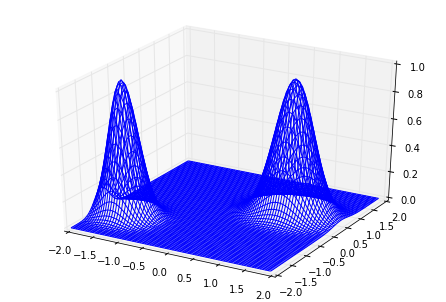

In [2]:
def activate_func(x):
    """
    params:
        x = np.array([x_1, x_2])
    """
    return np.exp(-4*((x[0]-1)**2) - 6*((x[1]-0.5)**2)) + \
        np.exp(-7*((x[0]+1.5)**2) - 9*((x[1]+1)**2))
    
x = y = np.arange(-2, 2, 0.05) 
X, Y = np.meshgrid(x, y)
Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) #<---ここでplot
plt.show()

### Krawczyk method

In [3]:
from ivmat import (
    ivmat, 
    fmat, 
    Krawczyk
)

In [4]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_x_1 = symbols("f_x_1", cls=Function)
f_x_2 = symbols("f_x_2", cls=Function)
nn = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
func_eval = lambda func: (lambda x_1, x_2, exp=im.exp: eval(str(func)))
f = fmat([[func_eval(nn)]])
f_grad_symbol = [[nn.diff(x_1)],[nn.diff(x_2)]]
f_grad = fmat([[func_eval(nn.diff(x_1))], [func_eval(nn.diff(x_2))]])
hes = hessian(nn, (x_1,x_2))
f_grad_grad = fmat([[None for i in range(hes.shape[1])] for j in range(hes.shape[0])])
for i in range(2):
    for j in range(2):
        f_grad_grad[i][j] = func_eval(hes[i,j])

x_1= interval[-1.6, -1.45]
x_2 = interval[-0.9,-1.2]
X = ivmat([[x_1],[x_2]])
kra = Krawczyk(f_grad,f_grad_grad,X)

----nn-----



----nn_grad----


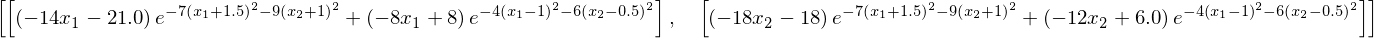


-----nn_hessian-----


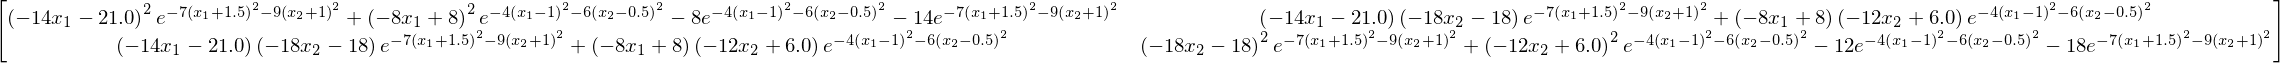


-----X-------
[[interval([-1.6, -1.45])], [interval([-1.2, -0.9])]]



In [5]:
print '----' + 'nn' + '-----'
display(nn)
print
print '----' + 'nn_grad' + '----'
display(f_grad_symbol)
print
print '-----' + 'nn_hessian' + '-----'
display(hes)
print
print '-----' + 'X' + '-------'
pprint(X)
print

[[interval([-1.6, -1.45])], [interval([-1.2, -0.9])]]
------ start ------
[[interval([-1.591533005993967, -1.45])], [interval([-1.161531362314863, -0.9])]]


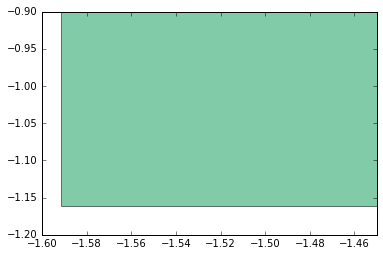

[[interval([-1.5601425448893749, -1.45])], [interval([-1.0873122646913087, -0.9])]]


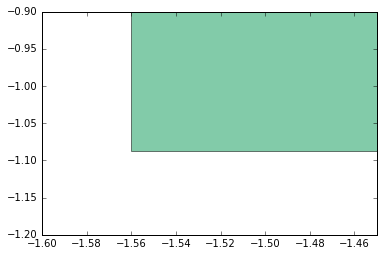

[[interval([-1.5173586386949545, -1.4814304137525731])], [interval([-1.027242993049014, -0.973764597792715])]]


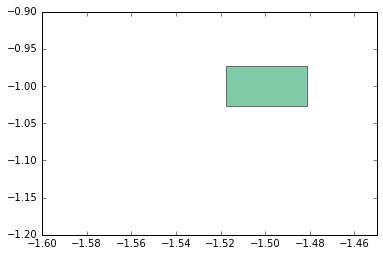

[[interval([-1.5008301403144149, -1.4991456349783487])], [interval([-1.0022362436336112, -0.9976831543773185])]]


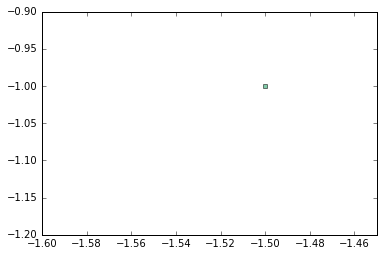

[[interval([-1.5000167348233018, -1.4999827806821817])], [interval([-1.000185372856922, -0.9998210753008416])]]


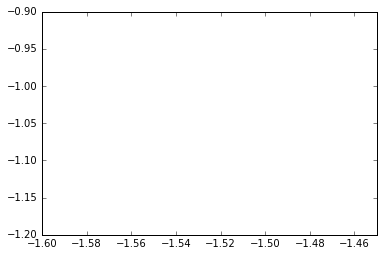

In [6]:
x_1= interval[-1.6, -1.45]
x_2 = interval[-0.9,-1.2]
X = ivmat([[x_1],[x_2]])
print X
print '------ start ------'


for i in range(5):
    res = kra.refine(kra.X, i+1)
    print res
    fig = plt.figure()
    plt.xlim(*X[0][0][0])
    plt.ylim(*X[1][0][0])
    ax = fig.add_subplot(111)
    left,right,below,above = res[0][0][0][0],res[0][0][0][1],res[1][0][0][0],res[1][0][0][1]
#    print left,right,below,above
    rect = Rectangle((left, below),
                    right - left,
                    above - below,
                    facecolor="#079955",
                    alpha = 0.5
                    )
    ax.add_patch(rect)
    plt.show()
    




[[interval([-1.591533005993967, -1.45])], [interval([-1.161531362314863, -0.9])]]


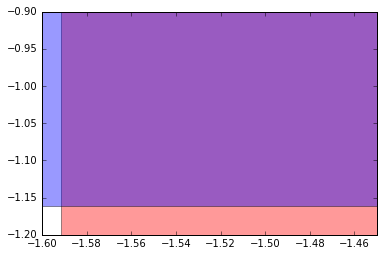

[[interval([-1.5601425448893749, -1.45])], [interval([-1.0873122646913087, -0.9])]]


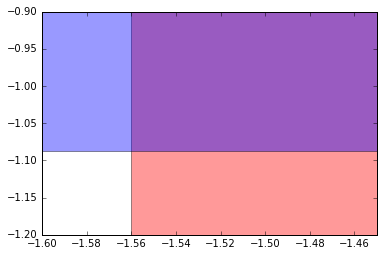

[[interval([-1.5173586386949545, -1.4814304137525731])], [interval([-1.027242993049014, -0.973764597792715])]]


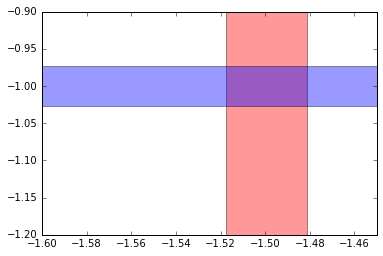

[[interval([-1.5008301403144149, -1.4991456349783487])], [interval([-1.0022362436336112, -0.9976831543773185])]]


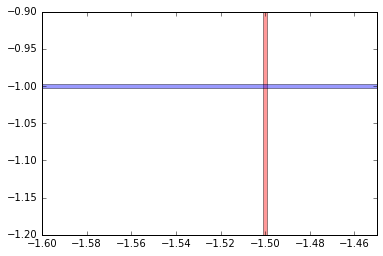

[[interval([-1.5000167348233018, -1.4999827806821817])], [interval([-1.000185372856922, -0.9998210753008416])]]


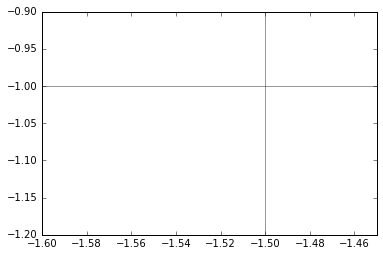

In [7]:
for i in range(5):
    res = kra.refine(kra.X, i+1)
    print res
    plt.figure()
    plt.xlim(*X[0][0][0])
    plt.ylim(*X[1][0][0])
    below,above,left,right = res[0][0][0][0],res[0][0][0][1],res[1][0][0][0],res[1][0][0][1]

    plt.axvspan(below, above, facecolor='r', alpha=0.4)
    plt.axhspan(left, right, facecolor='b', alpha=0.4)
    plt.show()

In [8]:
x_1 = interval[-1.57, 1.2]
x_2 = interval[-1.2, 0.7]
X = ivmat([[x_1],[x_2]])
kra = Krawczyk(f_grad,f_grad_grad,X)
#res = kra.refine(10, True)
boxes = kra.find_all_solution()
print '####'*30
pprint(boxes)

########################################################################################################################
[[[interval([-1.5000000000000002, -1.4999999999999996])],
  [interval([-1.000000000003591, -0.9999999999968395])]],
 [[interval([0.9999999999999982, 1.0000000000000016])],
  [interval([0.4999999999999977, 0.5000000000000014])]],
 [[interval([-0.4330215627746077, -0.4330215627746021])],
  [interval([-0.3027143445397387, -0.3027143445397319])]]]


In [ ]:
print f_grad.apply_args([[interval[5,15]], [interval[5,15]]])